
# Business Understanding

Corporacion Favorita is an Ecuador based company engaged in the organization, installation and administration of stores, markets and supermaektes. THe business areas in which the organiztion is involved are Commercial area, Real estate area and Industrial area. THe company aims to optimize its inventory management by accurately forecasting the product demand in various locations. 
By accurate demand forecasting, the company will be able to maintain optimal inventory levels, reduce wastage By aligning it supply with the customers demand, the company can enhance customer satisfaction, increase their sales revenue and reduce their carrying costs.
The key stakehoders are the Inventory managers, suppy chain managers, and store managers who will rely on the model of this project to make informed decisions related to purchasing, replenishment, and stock allocation.
The objectives of the project is to develop machine learning models to forecast the demand for products in various store locations of Corporation Favorita. The success of the project will depend on achieving the following outcomes:


* Accurate demand forecasting. The forecasts should consider varous factos like
the historical sales patters, seasonl variations, promotional activities,
location specific factos, and any other variable that might impact demand.


* Optimization of Inventory Levels. The forecast should gude inventory management decisions to maintain optimal stock levels.


* Timely and actionable insights. THe project should provide insights that will facilitate procative decision making


* Scalability and Adaptability: The model should be adaptable to accommodate changes in product assortments, market dynamics, and customer preferences over time.


# Data Description:

### train.csv

* The training data, comprising time series of features store_nbr, family, and onpromotion as well as the target sales.


* store_nbr identifies the store at which the products are sold.

* family identifies the type of product sold.

* sales gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).

* onpromotion gives the total number of items in a product family that were being promoted at a store at a given date.

### test.csv

* The test data, having the same features as the training data. You will predict the target sales for the dates in this file.

* The dates in the test data are for the 15 days after the last date in the training data.

### transaction.csv

* Contains date, store_nbr and transaction made on that specific date.
sample_submission.csv

* A sample submission file in the correct format.
stores.csv

* Store metadata, including city, state, type, and cluster.

* cluster is a grouping of similar stores.

### oil.csv

* Daily oil price which includes values during both the train and test data timeframes. (Ecuador is an oil-dependent country and its economical health is highly vulnerable to shocks in oil prices.)
holidays_events.csv

* Holidays and Events, with metadata
Additional holidays are days added a regular calendar holiday, for example, as typically happens around Christmas (making Christmas Eve a holiday).
Additional Notes

* Wages in the public sector are paid every two weeks on the 15th and on the last day of the month. Supermarket sales could be affected by this.

* A magnitude 7.8 earthquake struck Ecuador on April 16, 2016. People rallied in relief efforts donating water and other first need products which greatly affected supermarket sales for several weeks after the earthquake.

# Questions
1. Is the train dataset complete (has all the required dates)?

2. Which dates have the lowest and highest sales for each year?

3. Did the earthquake impact sales?

4. Are certain groups of stores selling more products? (Cluster, city, state, type)

5. Are sales affected by promotions, oil prices and holidays?

6. What analysis can we get from the date and its extractable features?

7. What is the difference between RMSLE, RMSE, MSE (or why is the MAE greater than all of them?)


# Hypothesis 
* H0 : Earthquake impact sales
* H1 : Earthquake does not impact sales


## Importations

## Setting Up a Connection To a Remote Microsoft SQL Server

### Installation

In [156]:
#For creating a connection string with the remote database
!pip install  pyodbc

In [157]:
#Package for creating environment variables 
!pip install python-dotenv

### Importations

In [316]:
#packages for data handling
import pandas as pd
import numpy as np
#VIsualization
import matplotlib.pyplot as plt
import seaborn as sns

import pyodbc
#For loading environment variables
from dotenv import dotenv_values

#Hypothesis testing
import scipy.stats as stats

# For accessing the environment variables
import os
#TO filter warnings
import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [159]:
# Loading environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')


# Getting the values for the credentials you set in the '.env' file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")


connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [160]:
# Using the connect method of the pyodbc library to pass in the connection string to connect to the server

connection = pyodbc.connect(connection_string)

In [161]:
# Sql query to get the oil data

query = "Select * from dbo.oil"
oil = pd.read_sql(query, connection)

In [162]:
oil.head(5)

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.139999
2,2013-01-03,92.970001
3,2013-01-04,93.120003
4,2013-01-07,93.199997


In [163]:
oil.shape

(1218, 2)

In [164]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [165]:
#Saving the oil dataset
oil.to_csv("oil.csv")

In [166]:
# Sql query to get stores data

query = "Select * from dbo.stores"
stores = pd.read_sql(query, connection)

In [167]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [168]:
stores.shape

(54, 5)

In [169]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [170]:
#Saving the stores data
stores.to_csv("stores.csv")

In [171]:
##Loading Holiday events data
query = "Select * From dbo.holidays_events"
holiday_events = pd.read_sql(query,connection)

In [172]:
holiday_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [173]:
holiday_events.shape

(350, 6)

In [174]:
holiday_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [175]:
#Saving holiday events dataset
holiday_events.to_csv("holiday_events")

In [176]:
# Loading test dataset
test = pd.read_csv('test.csv')

In [177]:
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [178]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [179]:
#Train dataset
train = pd.read_csv('train.csv')

In [180]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [181]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [182]:
#Transaction dataset
transactions = pd.read_csv('transactions.csv')

In [183]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [184]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


## Data Understanding

In [185]:
#Getting the shape of the datasets
print("Train dataset shape:", train.shape)
print("Test dataset shape:", test.shape)
print("Transactions dataset shape:", transactions.shape)
print("Stores dataset shape:", stores.shape)
print("Oil dataset shape:", oil.shape)
print("Holiday Events dataset shape:", holiday_events.shape)

#Columns in the datasets
print("\nTrain dataset columns:", train.columns)
print("Test dataset columns:", test.columns)
print("Transactions dataset columns:", transactions.columns)
print("Stores dataset columns:", stores.columns)
print("Oil dataset columns:", oil.columns)
print("Holiday Events dataset columns:", holiday_events.columns)

Train dataset shape: (3000888, 6)
Test dataset shape: (28512, 5)
Transactions dataset shape: (83488, 3)
Stores dataset shape: (54, 5)
Oil dataset shape: (1218, 2)
Holiday Events dataset shape: (350, 6)

Train dataset columns: Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')
Test dataset columns: Index(['id', 'date', 'store_nbr', 'family', 'onpromotion'], dtype='object')
Transactions dataset columns: Index(['date', 'store_nbr', 'transactions'], dtype='object')
Stores dataset columns: Index(['store_nbr', 'city', 'state', 'type', 'cluster'], dtype='object')
Oil dataset columns: Index(['date', 'dcoilwtico'], dtype='object')
Holiday Events dataset columns: Index(['date', 'type', 'locale', 'locale_name', 'description', 'transferred'], dtype='object')


The stores datset has a type column, which is different from the type column in the holiday datset

In [186]:
#Basic statistics of the datasets

print("Train dataset summary statistics:")
print(train.describe())

print("\nTest dataset summary statistics:")
print(test.describe())

print("\nTransactions dataset summary statistics:")
print(transactions.describe())

print("\nStores dataset summary statistics:")
print(stores.describe())

print("\nOil dataset summary statistics:")
print(oil.describe())

print("\nHoliday Events dataset summary statistics:")
print(holiday_events.describe())

Train dataset summary statistics:
                 id     store_nbr         sales   onpromotion
count  3.000888e+06  3.000888e+06  3.000888e+06  3.000888e+06
mean   1.500444e+06  2.750000e+01  3.577757e+02  2.602770e+00
std    8.662819e+05  1.558579e+01  1.101998e+03  1.221888e+01
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00
25%    7.502218e+05  1.400000e+01  0.000000e+00  0.000000e+00
50%    1.500444e+06  2.750000e+01  1.100000e+01  0.000000e+00
75%    2.250665e+06  4.100000e+01  1.958473e+02  0.000000e+00
max    3.000887e+06  5.400000e+01  1.247170e+05  7.410000e+02

Test dataset summary statistics:
                 id     store_nbr   onpromotion
count  2.851200e+04  28512.000000  28512.000000
mean   3.015144e+06     27.500000      6.965383
std    8.230850e+03     15.586057     20.683952
min    3.000888e+06      1.000000      0.000000
25%    3.008016e+06     14.000000      0.000000
50%    3.015144e+06     27.500000      0.000000
75%    3.022271e+06     41.000000     

The sales column in the train data set ranges from 0 to 26,067, with a mean of 203.15 and a standard deviation of 685.40. In the Oil dataset, the dcoilwtico column has missing values, as the count is 1,175 out of 1,218 total entries. The 'date' column in the holiday events dataset represents the dates of different holiday events. The holiday events dataset has 312 unique dates out of 350 total entries, indicating some events might occur on the same date.

In [187]:
## Missing Values

print("Missing values in Train dataset:")
print(train.isnull().sum())

print("\nMissing values in Test dataset:")
print(test.isnull().sum())

print("\nMissing values in Transactions dataset:")
print(transactions.isnull().sum())

print("\nMissing values in Stores dataset:")
print(stores.isnull().sum())

print("\nMissing values in Oil dataset:")
print(oil.isnull().sum())

print("\nMissing values in Holiday Events dataset:")
print(holiday_events.isnull().sum())


Missing values in Train dataset:
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

Missing values in Test dataset:
id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

Missing values in Transactions dataset:
date            0
store_nbr       0
transactions    0
dtype: int64

Missing values in Stores dataset:
store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

Missing values in Oil dataset:
date           0
dcoilwtico    43
dtype: int64

Missing values in Holiday Events dataset:
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64


In [188]:
## Unique values for each dataset

print("Unique values in Train dataset:")
print(train.nunique())

print("\nUnique values in Test dataset:")
print(test.nunique())

print("\nUnique values in Transactions dataset:")
print(transactions.nunique())

print("\nUnique values in Stores dataset:")
print(stores.nunique())

print("\nUnique values in Oil dataset:")
print(oil.nunique())

print("\nUnique values in Holiday Events dataset:")
print(holiday_events.nunique())

Unique values in Train dataset:
id             3000888
date              1684
store_nbr           54
family              33
sales           379610
onpromotion        362
dtype: int64

Unique values in Test dataset:
id             28512
date              16
store_nbr         54
family            33
onpromotion      212
dtype: int64

Unique values in Transactions dataset:
date            1682
store_nbr         54
transactions    4993
dtype: int64

Unique values in Stores dataset:
store_nbr    54
city         22
state        16
type          5
cluster      17
dtype: int64

Unique values in Oil dataset:
date          1218
dcoilwtico     998
dtype: int64

Unique values in Holiday Events dataset:
date           312
type             6
locale           3
locale_name     24
description    103
transferred      2
dtype: int64


In [189]:
print("Train dataset columns data types:")
print(train.dtypes)

print("\nTest dataset data types:")
print(test.dtypes)

print("\nTransactions dataset data types:")
print(transactions.dtypes)

print("\nStores dataset data types:")
print(stores.dtypes)

print("\nOil dataset data types:")
print(oil.dtypes)

print("\nHoliday Events dataset data types:")
print(holiday_events.dtypes)


Train dataset columns data types:
id               int64
date            object
store_nbr        int64
family          object
sales          float64
onpromotion      int64
dtype: object

Test dataset data types:
id              int64
date           object
store_nbr       int64
family         object
onpromotion     int64
dtype: object

Transactions dataset data types:
date            object
store_nbr        int64
transactions     int64
dtype: object

Stores dataset data types:
store_nbr     int64
city         object
state        object
type         object
cluster       int64
dtype: object

Oil dataset data types:
date           object
dcoilwtico    float64
dtype: object

Holiday Events dataset data types:
date           object
type           object
locale         object
locale_name    object
description    object
transferred      bool
dtype: object


## Data Preprocessing



### Data Preprocessing  on train dataset

In [190]:
#Overview of the train dataset
train.head(5)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [191]:
#COnverting the date column into datetime datatype
train['date'] = pd.to_datetime(train['date'])

In [192]:
#drop the unnecessary column
train.drop('id',axis=1,inplace=True)

In [193]:
train.isna().sum()

date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [194]:
#The column with the missing value
#train[train['onpromotion'].isna()]

In [195]:
#Unique values in the promotion column
train['onpromotion'].nunique()

362

In [196]:
#train['onpromotion'].fillna(0.0)

In [197]:
#Checking for duplicates
train.duplicated().sum()

0

In [198]:
#Setting the date column as the index
#train.set_index('date')

In [199]:
#train['date']=pd.to_datetime(train['date'])
#train['date'] =train['date'].dt.date

### Checking for the completeness of the dates in the train dataset

In [200]:
#Checking for the minimum date
train['date'].min()

Timestamp('2013-01-01 00:00:00')

The train dataset is as from January first, 2013

In [201]:
#The maximum date 
train['date'].max()

Timestamp('2017-08-15 00:00:00')

In [202]:
#Converting the date column into date
train['date'] =train['date'].dt.date


In [203]:
#Checking for the range of the dates column
dates_range = pd.date_range(start=train['date'].min(),end=train['date'].max())
dates_range

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09',
               '2017-08-10', '2017-08-11', '2017-08-12', '2017-08-13',
               '2017-08-14', '2017-08-15'],
              dtype='datetime64[ns]', length=1688, freq='D')

In [204]:
#Checking for the missing dates
dates_missing = set(dates_range.date) - set(train['date'].unique())
dates_missing

{datetime.date(2013, 12, 25),
 datetime.date(2014, 12, 25),
 datetime.date(2015, 12, 25),
 datetime.date(2016, 12, 25)}

In [205]:
#Creating a new dataframe with the values in the date range
new_df = pd.DataFrame(index=dates_range)


In [206]:
# Converting the index of new_df to datetime64 data type
new_df.head()

""
2013-01-01
2013-01-02
2013-01-03
2013-01-04
2013-01-05


In [207]:
#Shape of the new dataframe
new_df.shape

(1688, 0)

To preserve the temporal order of the data, the imputation used is backwardfill. Interpolation in Python is a technique used to estimate unknown data points between two known data points. Backward fill is an approach where missing values are filled with the next available observation in the dataset (Agrawal, 2022).By filling missing values with the next available observation, the imputed values maintain the temporal sequence of the data.

In [208]:
# Convert 'date' column in train DataFrame to datetime format
train['date'] = pd.to_datetime(train['date'])
#Mergning the missing dates with the train dataset
train_merged = new_df.merge(train, how='left', left_index=True, right_on='date')
train_merged.head()

,date,store_nbr,family,sales,onpromotion
0.0,2013-01-01,1.0,AUTOMOTIVE,0.0,0.0
1.0,2013-01-01,1.0,BABY CARE,0.0,0.0
2.0,2013-01-01,1.0,BEAUTY,0.0,0.0
3.0,2013-01-01,1.0,BEVERAGES,0.0,0.0
4.0,2013-01-01,1.0,BOOKS,0.0,0.0


In [209]:
train_merged.isna().sum()

date           0
store_nbr      4
family         4
sales          4
onpromotion    4
dtype: int64

In [210]:
# Sort the merged DataFrame by date
train_merged = train_merged.sort_values('date')
# Resetting the index
train_merged = train_merged.reset_index(drop=True)
train_merged.head()

,date,store_nbr,family,sales,onpromotion
0,2013-01-01,1.0,AUTOMOTIVE,0.0,0.0
1,2013-01-01,42.0,CELEBRATION,0.0,0.0
2,2013-01-01,42.0,BREAD/BAKERY,0.0,0.0
3,2013-01-01,42.0,BOOKS,0.0,0.0
4,2013-01-01,42.0,BEVERAGES,0.0,0.0


In [211]:
# Performing backfill interpolation on the merged DataFrame
train_merged_interpolated = train_merged.interpolate(method='bfill')

In [212]:
train_merged_interpolated.head()

,date,store_nbr,family,sales,onpromotion
0,2013-01-01,1.0,AUTOMOTIVE,0.0,0.0
1,2013-01-01,42.0,CELEBRATION,0.0,0.0
2,2013-01-01,42.0,BREAD/BAKERY,0.0,0.0
3,2013-01-01,42.0,BOOKS,0.0,0.0
4,2013-01-01,42.0,BEVERAGES,0.0,0.0


In [213]:
train_merged_interpolated.isna().sum()

date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [214]:
train_merged_interpolated.duplicated().sum()

0

In [215]:
train_merged_interpolated['date'].nunique()

1688

In [216]:
train_merged_interpolated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000892 entries, 0 to 3000891
Data columns (total 5 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   store_nbr    float64       
 2   family       object        
 3   sales        float64       
 4   onpromotion  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 114.5+ MB


### Oil dataset Preparation

In [217]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.139999
2,2013-01-03,92.970001
3,2013-01-04,93.120003
4,2013-01-07,93.199997


In [218]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [219]:
#Convertinf to date date typy
oil['date']=pd.to_datetime(oil['date'])


In [220]:
oil.isna().sum()

date           0
dcoilwtico    43
dtype: int64

In [221]:
#percentage of the missing data
(oil.isna().sum()*100)/len(oil)

date          0.000000
dcoilwtico    3.530378
dtype: float64

#### Checking for the completemness of the dates in the oil dataset

In [222]:
#COnvert into date data type
oil['date'] =oil['date'].dt.date

In [223]:
#The start date
oil['date'].min()

datetime.date(2013, 1, 1)

In [224]:
#The end date
oil['date'].max()

datetime.date(2017, 8, 31)

In [225]:
oil_date_range = pd.date_range(start=oil['date'].min(),end=oil['date'].max())
oil_date_range

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-08-22', '2017-08-23', '2017-08-24', '2017-08-25',
               '2017-08-26', '2017-08-27', '2017-08-28', '2017-08-29',
               '2017-08-30', '2017-08-31'],
              dtype='datetime64[ns]', length=1704, freq='D')

In [226]:
missing_oil_dates = set(oil_date_range.date) - set(oil['date'].unique())
missing_oil_dates

{datetime.date(2013, 1, 5),
 datetime.date(2013, 1, 6),
 datetime.date(2013, 1, 12),
 datetime.date(2013, 1, 13),
 datetime.date(2013, 1, 19),
 datetime.date(2013, 1, 20),
 datetime.date(2013, 1, 26),
 datetime.date(2013, 1, 27),
 datetime.date(2013, 2, 2),
 datetime.date(2013, 2, 3),
 datetime.date(2013, 2, 9),
 datetime.date(2013, 2, 10),
 datetime.date(2013, 2, 16),
 datetime.date(2013, 2, 17),
 datetime.date(2013, 2, 23),
 datetime.date(2013, 2, 24),
 datetime.date(2013, 3, 2),
 datetime.date(2013, 3, 3),
 datetime.date(2013, 3, 9),
 datetime.date(2013, 3, 10),
 datetime.date(2013, 3, 16),
 datetime.date(2013, 3, 17),
 datetime.date(2013, 3, 23),
 datetime.date(2013, 3, 24),
 datetime.date(2013, 3, 30),
 datetime.date(2013, 3, 31),
 datetime.date(2013, 4, 6),
 datetime.date(2013, 4, 7),
 datetime.date(2013, 4, 13),
 datetime.date(2013, 4, 14),
 datetime.date(2013, 4, 20),
 datetime.date(2013, 4, 21),
 datetime.date(2013, 4, 27),
 datetime.date(2013, 4, 28),
 datetime.date(2013, 5, 

In [227]:
oil['date'].nunique()

1218

In [228]:
range_df =  pd.DataFrame(index=oil_date_range)
range_df.head()

""
2013-01-01
2013-01-02
2013-01-03
2013-01-04
2013-01-05


In [229]:
# Convert 'date' column in train DataFrame to datetime format
oil['date'] = pd.to_datetime(oil['date'])

In [230]:
#Merging with the rest of the columns
oil_merged = range_df.merge(oil, how='left', left_index=True, right_on='date')
oil_merged.head()

,date,dcoilwtico
0.0,2013-01-01,NaN
1.0,2013-01-02,93.139999
2.0,2013-01-03,92.970001
3.0,2013-01-04,93.120003
NaN,2013-01-05,NaN


In [231]:
oil_merged.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1704 entries, 0.0 to 1217.0
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1704 non-null   datetime64[ns]
 1   dcoilwtico  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 39.9 KB


In [232]:
# Sort the merged DataFrame by date
oil_merged = oil_merged.sort_values('date')
oil_merged

,date,dcoilwtico
0.0,2013-01-01,NaN
1.0,2013-01-02,93.139999
2.0,2013-01-03,92.970001
3.0,2013-01-04,93.120003
NaN,2013-01-05,NaN
...,...,...
NaN,2017-08-27,NaN
1214.0,2017-08-28,46.400002
1215.0,2017-08-29,46.459999
1216.0,2017-08-30,45.959999


In [233]:
# Reset the index
oil_merged = oil_merged.reset_index(drop=True)
oil_merged

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.139999
2,2013-01-03,92.970001
3,2013-01-04,93.120003
4,2013-01-05,NaN
...,...,...
1699,2017-08-27,NaN
1700,2017-08-28,46.400002
1701,2017-08-29,46.459999
1702,2017-08-30,45.959999


In [234]:
# Perform linear interpolation on the merged DataFrame using bfill
oil_merged_interpolated = oil_merged.interpolate(method='bfill')

In [235]:
oil_merged_interpolated.head()

,date,dcoilwtico
0,2013-01-01,93.139999
1,2013-01-02,93.139999
2,2013-01-03,92.970001
3,2013-01-04,93.120003
4,2013-01-05,93.199997


In [236]:
oil_merged_interpolated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1704 non-null   datetime64[ns]
 1   dcoilwtico  1704 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 26.8 KB


#### Data Preprocessing on the Holiday events Dataset

In [237]:
holiday_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [238]:
holiday_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [239]:
#Renaming the type column
holiday_events.rename(columns={'type':'holiday_type'},inplace=True)

In [240]:
#COnverting the dates into datetume data type
holiday_events['date'] = pd.to_datetime(holiday_events['date'])

In [241]:
holiday_date_range = pd.date_range(start=holiday_events['date'].min(),end=holiday_events['date'].max())
holiday_date_range

DatetimeIndex(['2012-03-02', '2012-03-03', '2012-03-04', '2012-03-05',
               '2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10', '2012-03-11',
               ...
               '2017-12-17', '2017-12-18', '2017-12-19', '2017-12-20',
               '2017-12-21', '2017-12-22', '2017-12-23', '2017-12-24',
               '2017-12-25', '2017-12-26'],
              dtype='datetime64[ns]', length=2126, freq='D')

In [242]:
missing_holiday_dates = set(holiday_date_range.date) - set(holiday_events['date'].unique())
missing_holiday_dates

{datetime.date(2017, 2, 13),
 datetime.date(2012, 8, 7),
 datetime.date(2015, 6, 27),
 datetime.date(2013, 4, 30),
 datetime.date(2014, 3, 29),
 datetime.date(2014, 10, 20),
 datetime.date(2015, 1, 13),
 datetime.date(2015, 7, 26),
 datetime.date(2014, 3, 10),
 datetime.date(2012, 10, 3),
 datetime.date(2013, 10, 19),
 datetime.date(2017, 8, 19),
 datetime.date(2015, 6, 29),
 datetime.date(2017, 7, 30),
 datetime.date(2012, 8, 26),
 datetime.date(2016, 12, 6),
 datetime.date(2015, 9, 23),
 datetime.date(2016, 11, 17),
 datetime.date(2012, 10, 20),
 datetime.date(2017, 11, 27),
 datetime.date(2013, 11, 20),
 datetime.date(2014, 10, 16),
 datetime.date(2013, 7, 28),
 datetime.date(2014, 10, 21),
 datetime.date(2013, 12, 17),
 datetime.date(2013, 10, 30),
 datetime.date(2012, 3, 14),
 datetime.date(2012, 7, 27),
 datetime.date(2014, 10, 26),
 datetime.date(2014, 11, 21),
 datetime.date(2017, 3, 18),
 datetime.date(2014, 5, 28),
 datetime.date(2012, 5, 19),
 datetime.date(2015, 8, 27),
 da

In [243]:
#N new dataframe with the date range
holiday_df =  pd.DataFrame(index=holiday_date_range)
holiday_df.head()

""
2012-03-02
2012-03-03
2012-03-04
2012-03-05
2012-03-06


In [244]:
#merging
holiday_merged = holiday_df.merge(holiday_events, how='left', left_index=True, right_on='date')
holiday_merged.head()

,date,holiday_type,locale,locale_name,description,transferred
0.0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
NaN,2012-03-03,NaN,NaN,NaN,NaN,NaN
NaN,2012-03-04,NaN,NaN,NaN,NaN,NaN
NaN,2012-03-05,NaN,NaN,NaN,NaN,NaN
NaN,2012-03-06,NaN,NaN,NaN,NaN,NaN


In [245]:
# Sort the merged DataFrame by date
holiday_merged = holiday_merged.sort_values('date')
# Resetting the index
holiday_merged = holiday_merged.reset_index(drop=True)
holiday_merged.head()

,date,holiday_type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-03-03,NaN,NaN,NaN,NaN,NaN
2,2012-03-04,NaN,NaN,NaN,NaN,NaN
3,2012-03-05,NaN,NaN,NaN,NaN,NaN
4,2012-03-06,NaN,NaN,NaN,NaN,NaN


In [246]:
# Perform interpolation on the merged DataFrame using bfill
holiday_merged_interpolated = holiday_merged.interpolate(method='bfill')
holiday_merged_interpolated.head()

,date,holiday_type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-03-03,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-03-04,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
3,2012-03-05,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
4,2012-03-06,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False


In [247]:
holiday_merged_interpolated.nunique()

date            2126
holiday_type       6
locale             3
locale_name       24
description      103
transferred        2
dtype: int64

In [248]:
holiday_merged_interpolated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2164 entries, 0 to 2163
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          2164 non-null   datetime64[ns]
 1   holiday_type  2164 non-null   object        
 2   locale        2164 non-null   object        
 3   locale_name   2164 non-null   object        
 4   description   2164 non-null   object        
 5   transferred   2164 non-null   bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 86.8+ KB


A holiday that is transferred officially falls on that calendar day but was moved to another date by the government. A transferred day is more like a normal day than a holiday. To update the "date" column in the DataFrame, specifically for rows where the holiday is marked as "Transfer" in the "type" column.We can assign the value from the "transferred" column to the corresponding rows in the "date" column.

In [249]:
#with pd.option_context('display.max_rows',None):
  #  print(holiday_events['type'])

### Transcation dataset

In [250]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [251]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [252]:
transactions_date_range = pd.date_range(start=transactions['date'].min(),end=transactions['date'].max())
transactions_date_range

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09',
               '2017-08-10', '2017-08-11', '2017-08-12', '2017-08-13',
               '2017-08-14', '2017-08-15'],
              dtype='datetime64[ns]', length=1688, freq='D')

In [253]:
missing_transactions_dates = set(transactions_date_range.date) - set(transactions['date'].unique())
missing_transactions_dates

{datetime.date(2017, 2, 13),
 datetime.date(2015, 6, 27),
 datetime.date(2013, 4, 30),
 datetime.date(2014, 3, 29),
 datetime.date(2014, 10, 20),
 datetime.date(2015, 1, 13),
 datetime.date(2015, 7, 26),
 datetime.date(2014, 3, 10),
 datetime.date(2013, 10, 19),
 datetime.date(2015, 6, 29),
 datetime.date(2017, 7, 30),
 datetime.date(2016, 12, 6),
 datetime.date(2015, 9, 23),
 datetime.date(2016, 11, 17),
 datetime.date(2013, 11, 20),
 datetime.date(2014, 10, 16),
 datetime.date(2013, 7, 28),
 datetime.date(2014, 10, 21),
 datetime.date(2013, 12, 17),
 datetime.date(2013, 10, 30),
 datetime.date(2014, 10, 26),
 datetime.date(2014, 11, 21),
 datetime.date(2017, 3, 18),
 datetime.date(2014, 5, 28),
 datetime.date(2015, 8, 27),
 datetime.date(2013, 7, 10),
 datetime.date(2016, 10, 20),
 datetime.date(2016, 8, 20),
 datetime.date(2015, 4, 27),
 datetime.date(2015, 8, 23),
 datetime.date(2014, 12, 23),
 datetime.date(2015, 9, 30),
 datetime.date(2015, 4, 15),
 datetime.date(2014, 3, 21),
 d

In [254]:
transc_df =  pd.DataFrame(index=transactions_date_range)
transc_df.head()

""
2013-01-01
2013-01-02
2013-01-03
2013-01-04
2013-01-05


In [255]:
# Convert 'date' column in train DataFrame to datetime format
transactions['date'] = pd.to_datetime(transactions['date'])

In [256]:
transactions_merged = transc_df.merge(transactions, how='left', left_index=True, right_on='date')
transactions_merged.head()

,date,store_nbr,transactions
0.0,2013-01-01,25.0,770.0
1.0,2013-01-02,1.0,2111.0
2.0,2013-01-02,2.0,2358.0
3.0,2013-01-02,3.0,3487.0
4.0,2013-01-02,4.0,1922.0


In [257]:
# Sort the merged DataFrame by date
transactions_merged = transactions_merged.sort_values('date')
# Resetting the index
transactions_merged = transactions_merged.reset_index(drop=True)
transactions_merged.head()

,date,store_nbr,transactions
0,2013-01-01,25.0,770.0
1,2013-01-02,30.0,708.0
2,2013-01-02,31.0,1401.0
3,2013-01-02,32.0,776.0
4,2013-01-02,33.0,1163.0


In [258]:
# Perform interpolation on the merged DataFrame using bfill
transactions_merged_interpolated = transactions_merged.interpolate(method='bfill')

In [259]:
transactions_merged_interpolated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83494 entries, 0 to 83493
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83494 non-null  datetime64[ns]
 1   store_nbr     83494 non-null  float64       
 2   transactions  83494 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.9 MB


In [260]:
transactions_merged_interpolated.nunique()

date            1688
store_nbr         54
transactions    4993
dtype: int64

## Merging the Datasets

In [261]:
#Merging interpolated train and interpolated oil datasets
Train = train_merged_interpolated.merge(oil_merged_interpolated,how='inner',on='date')
Train.head()

,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,2013-01-01,1.0,AUTOMOTIVE,0.0,0.0,93.139999
1,2013-01-01,42.0,CELEBRATION,0.0,0.0,93.139999
2,2013-01-01,42.0,BREAD/BAKERY,0.0,0.0,93.139999
3,2013-01-01,42.0,BOOKS,0.0,0.0,93.139999
4,2013-01-01,42.0,BEVERAGES,0.0,0.0,93.139999


In [262]:
Train = pd.merge(Train,stores,on='store_nbr')
Train.head()

,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type,cluster
0,2013-01-01,1.0,AUTOMOTIVE,0.0,0.0,93.139999,Quito,Pichincha,D,13
1,2013-01-01,1.0,MEATS,0.0,0.0,93.139999,Quito,Pichincha,D,13
2,2013-01-01,1.0,MAGAZINES,0.0,0.0,93.139999,Quito,Pichincha,D,13
3,2013-01-01,1.0,"LIQUOR,WINE,BEER",0.0,0.0,93.139999,Quito,Pichincha,D,13
4,2013-01-01,1.0,LINGERIE,0.0,0.0,93.139999,Quito,Pichincha,D,13


In [108]:
#Train = pd.merge(Train, holiday_merged_interpolated, on='date')
#Train.head()

,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type,cluster,holiday_type,locale,locale_name,description,transferred
0,2013-01-01,1.0,AUTOMOTIVE,0.0,0.0,93.139999,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
1,2013-01-01,1.0,MEATS,0.0,0.0,93.139999,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
2,2013-01-01,1.0,MAGAZINES,0.0,0.0,93.139999,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
3,2013-01-01,1.0,"LIQUOR,WINE,BEER",0.0,0.0,93.139999,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
4,2013-01-01,1.0,LINGERIE,0.0,0.0,93.139999,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False


In [263]:
Train = pd.merge(Train, transactions_merged_interpolated, on=['date','store_nbr'])
Train.head()

,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type,cluster,transactions
0,2013-01-02,1.0,MEATS,369.101,0.0,93.139999,Quito,Pichincha,D,13,2111.0
1,2013-01-02,1.0,MAGAZINES,0.000,0.0,93.139999,Quito,Pichincha,D,13,2111.0
2,2013-01-02,1.0,"LIQUOR,WINE,BEER",67.000,0.0,93.139999,Quito,Pichincha,D,13,2111.0
3,2013-01-02,1.0,LINGERIE,13.000,0.0,93.139999,Quito,Pichincha,D,13,2111.0
4,2013-01-02,1.0,LAWN AND GARDEN,10.000,0.0,93.139999,Quito,Pichincha,D,13,2111.0


In [265]:
#Columna in the merged dataset
Train.columns

Index(['date', 'store_nbr', 'family', 'sales', 'onpromotion', 'dcoilwtico',
       'city', 'state', 'type', 'cluster', 'transactions'],
      dtype='object')

In [266]:
#Checking for missing values for the merged dataset
Train.isna().sum()

date            0
store_nbr       0
family          0
sales           0
onpromotion     0
dcoilwtico      0
city            0
state           0
type            0
cluster         0
transactions    0
dtype: int64

In [267]:
#Checking for the data types, entries, and the number of columns
Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2755171 entries, 0 to 2755170
Data columns (total 11 columns):
 #   Column        Dtype         
---  ------        -----         
 0   date          datetime64[ns]
 1   store_nbr     float64       
 2   family        object        
 3   sales         float64       
 4   onpromotion   float64       
 5   dcoilwtico    float64       
 6   city          object        
 7   state         object        
 8   type          object        
 9   cluster       int64         
 10  transactions  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 252.2+ MB


In [268]:
#Basic statistics of the merged dataset
Train.describe().T

,count,mean,std,min,25%,50%,75%,max
store_nbr,2755171.0,26.939612,15.608222,1.000000,13.000000,27.00,40.000000,54.000000
sales,2755171.0,388.820509,1142.816261,0.000000,0.000000,17.00,230.594500,124717.000000
onpromotion,2755171.0,2.832978,12.724857,0.000000,0.000000,0.00,0.000000,741.000000
dcoilwtico,2755171.0,66.596112,25.504544,26.190001,46.099998,52.66,95.129997,110.620003
cluster,2755171.0,8.533575,4.724344,1.000000,4.000000,9.00,13.000000,17.000000
transactions,2755171.0,1694.580638,963.279739,5.000000,1046.000000,1393.00,2079.000000,8359.000000


* sales: The total sales for a product family at a particular store on a given date. The minimum sales value is 0, and the maximum sales value is 124,717. The average sales are 390.05, with a standard deviation of 1,148.18.

* onpromotion: Is the total number of items in a product family that were being promoted at a store on a given date. The minimum value is 0, and the maximum value is 741. The average value is approximately 2.85, with a standard deviation of 12.76.

* dcoilwtico: The daily oil price. The minimum price is 26.19, and the maximum price is 110.62. The average oil price is approximately 66.52, with a standard deviation of 25.50.

* cluster: The cluster grouping of stores. The minimum cluster number is 1, and the maximum cluster number is 17. The average cluster number is approximately 8.53, with a standard deviation of 4.72.

* transactions: The number of transactions made on a specific date. The minimum number of transactions is 5, and the maximum number is 8,359. The average number of transactions is approximately 1,697.05, with a standard deviation of 966.83.

In [269]:
#Indexing the date column
Train = Train.set_index('date')

In [270]:
#Data from the first day in 2014
Train.loc['2014-01-01']

,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type,cluster,transactions
date,,,,,,,,,,
2014-01-01,36.0,HOME AND KITCHEN I,6.000000,0.0,95.139999,Libertad,Guayas,E,10,487.0
2014-01-01,36.0,HARDWARE,1.000000,0.0,95.139999,Libertad,Guayas,E,10,487.0
2014-01-01,36.0,GROCERY II,11.000000,0.0,95.139999,Libertad,Guayas,E,10,487.0
2014-01-01,36.0,GROCERY I,1021.868000,0.0,95.139999,Libertad,Guayas,E,10,487.0
2014-01-01,36.0,FROZEN FOODS,68.270004,0.0,95.139999,Libertad,Guayas,E,10,487.0
...,...,...,...,...,...,...,...,...,...,...
2014-01-01,25.0,PREPARED FOODS,26.000000,0.0,95.139999,Salinas,Santa Elena,D,1,840.0
2014-01-01,25.0,PRODUCE,762.641400,0.0,95.139999,Salinas,Santa Elena,D,1,840.0
2014-01-01,25.0,PET SUPPLIES,2.000000,0.0,95.139999,Salinas,Santa Elena,D,1,840.0


<AxesSubplot:>

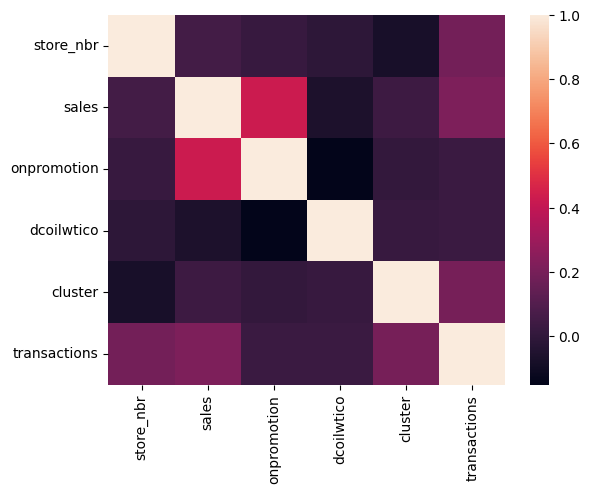

In [271]:
sns.heatmap(Train.corr())

## Univariate Analysis

### 1. What is the overall sales trend over time?

In [ ]:
#To create a new figure
plt.figure(figsize=(15,8))
#To create a lineplot
Train['sales'].plot(linewidth = 0.5)


There are spikes of high sales at the end of each year which indicates a seasonal pattern in the sales data. This suggests that there is increased consumer demand and purchasing activity during certain times of the year, specifically towards the end of each year. This could be due to various factors such as holiday shopping, festive seasons, or year-end promotions.

There are few months with high sales between 2016 and 2017.This indicates a period of increased sales activity. This could be attributed to specific events or promotions that occurred during that time, driving higher sales during those months.

These observations suggest that there are seasonal patterns in the sales data, with certain periods experiencing higher sales compared to others. 
There is no long term increase or decrease in the sales over the years, which suggests that there is no trend.

### Deep dive on the Year 2016

In the year 2016, there is a significant increase in the amount of sales, let take a closer look at the Year, to get the months with the high sales and what might have caused the increase in sales.

In [ ]:
#To create a figure
plt.figure(figsize=(10,6))
#To extract the sales in the year 2016
sales_2016 = Train.loc['2016','sales'] 

#Setting the names of the month
sales_2016.index = sales_2016.index.strftime('%B')
#Plotting
sales_2016.plot()
plt.xlabel("Month")
plt.ylabel("Monthly sales for the year 2016")

THe high increase in the amount of sales can be seen towards the end of march upto the start of April, and the start of October.The increase in sales towards the end of March and the beginning of April in 2016 could be attributed to the Easter holiday period. Easter is a significant holiday that often involves increased consumer spending, particularly on items such as food, gifts, and decorations. This surge in sales during the Easter period can be observed in various retail sectors.

Similarly, the increase in sales at the beginning of October in 2016 could be related to the holiday season and festivals such as Halloween and the preparations for the upcoming Christmas season. During this time, consumers tend to spend more on festive items, gifts, and food, resulting in a boost in sales.


### 1. Which state had the highest sales

In [ ]:
plt.figure(figsize=(27,10))
State_sales=Train.groupby("state")['sales'].sum().reset_index()
sns.barplot(data=State_sales,x="state",y="sales")
#plt.show()

The graph shows pichincha state having the highest sales, followed by Guayaas and then Azuay. There is a huge difference between the sales made by Pichincha and the second place Guayas. The rest of the states show low sales as compared to Pichincha which shows the dominance of Pichincha in terms of sales volume.  The lower sales in the rest of the states compared to Pichincha indicate that these states may have different market dynamics or face challenges in achieving higher sales volumes.

### How does promotion impact sales?

In [ ]:
# Filter the data for promoted products
promoted_data = Train[Train['onpromotion'] == True]

# Filter the data for non-promoted products
non_promoted_data = Train[Train['onpromotion'] == False]

In [ ]:
# Calculate the sales for promoted and non-promoted products
promoted_sales = promoted_data['sales']
non_promoted_sales = non_promoted_data['sales']

# Compare sales performance
promoted_mean_sales = promoted_sales.mean()
non_promoted_mean_sales = non_promoted_sales.mean()

# Visualize the comparison
plt.figure(figsize=(10, 6))
plt.bar(['Promoted', 'Non-promoted'], [promoted_mean_sales, non_promoted_mean_sales])
plt.xlabel('Promotion')
plt.ylabel('Average Sales')
plt.title('Impact of Promotion on Sales')
plt.show()


Based on the analysis, it can be observed that products on promotion had the highest average sales compared to non-promoted products. This suggests that promotions have a positive impact on sales. The higher average sales for promoted products indicate that promotional activities effectively attract customers and encourage them to make purchases.

This finding aligns with common marketing strategies, where promotions are often used to stimulate customer interest and boost sales. By offering discounts, special offers, or other promotional incentives, businesses can create a sense of urgency and attract more customers to make purchases.

### 3. Did the earthquake impact sales?

In [ ]:

# Define the time period
pre_earthquake_start = '2016-04-01'
pre_earthquake_end = '2016-04-15'
post_earthquake_start = '2016-04-17'
post_earthquake_end = '2016-06-30'

# Filter the sales data for the pre-earthquake period
pre_earthquake_sales = Train[(Train.index >= pre_earthquake_start) & (Train.index <= pre_earthquake_end)]

# Filter the sales data for the post-earthquake period
post_earthquake_sales = Train[(Train.index >= post_earthquake_start) & (Train.index <= post_earthquake_end)]

In [ ]:
# Calculate the total sales for the pre-earthquake period
pre_earthquake_total_sales = pre_earthquake_sales['sales'].sum()

# Calculate the total sales for the post-earthquake period
post_earthquake_total_sales = post_earthquake_sales['sales'].sum()

# Create a bar chart
labels = ['Pre-Earthquake', 'Post-Earthquake']
sales_data = [pre_earthquake_total_sales, post_earthquake_total_sales]

plt.bar(labels, sales_data)
plt.xlabel('Time Period')
plt.ylabel('Total Sales')
plt.title('Impact of Earthquake on Sales')
plt.show()


The bar chart representation shows that the total sales during the post-earthquake period are higher than the total sales during the pre-earthquake period. This indicates that there was an increase in sales following the earthquake.

There could be several reasons for this positive impact on sales. One possible explanation is the increased demand for essential products and supplies in the aftermath of the earthquake. People may have stocked up on necessities such as food, water, and other essential items, leading to higher sales for supermarkets and retailers.

Additionally, relief efforts and donations from individuals and organizations could have contributed to the increase in sales. People often rally together to support those affected by natural disasters, leading to an increase in purchases of relief items and donations.

It is important to note that the positive impact on sales may not be uniform across all types of products or stores. Certain product categories such as emergency supplies, non-perishable food items, and water may have witnessed a significant surge in sales, while others might not have experienced the same level of impact.

Overall, the earthquake had a positive impact on sales, driven by increased demand for essential products and the collective response of individuals and organizations to support relief efforts.

## Bivariate Analysis

### Relationship between Oil Prices and Sales

In [ ]:
# Relationship between sales and profit
plt.figure(figsize=(8,6))
sns.scatterplot(Train["sales"], Train["dcoilwtico"])
plt.title("Relationship between Sales and Oil Prices")

Based on the scatterplot, the majority of data points are clustered in a vertical line along the y-axis. This indicates that there is a strong concentration of sales values at relatively low levels. Additionally, the scatterplot suggests that the majority of sales values fall below the 20,000 mark on the x-axis.

This concentration of data points in a vertical line indicates that there is limited variation in sales across different values of the oil prices . It suggests that changes in oil prices may not have a significant impact on sales, at least within the observed range of oil prices.

## Hypothesis Testing

* H0 : Earthquake impact sales
* H1 : Earthquake does not impact sales

In [277]:
# Defining the time periods when the earthquake happpened
pre_earthquake_sales = Train.loc[pre_earthquake_start:pre_earthquake_end, 'sales']
post_earthquake_sales = Train.loc[post_earthquake_start:post_earthquake_end, 'sales']

# T-test
t_statistic, p_value = stats.ttest_ind(pre_earthquake_sales, post_earthquake_sales)

# Set the significance level
alpha = 0.05

# Interpret the results
if p_value < alpha:
    print("WE reject the null hypothesis that earthquake has a significant impact on sales.")
else:
    print("We do not reject the null hypothesis that Earthquake affected sales.")



We do not reject the null hypothesis that Earthquake affected sales.


## Feature Engineering

In [280]:
#A new column with the state and the city
Train['State_City'] = Train['state'] + '_' + Train['city']
#Drop the state and city columns
Train.drop(['state','city','cluster','type'],axis=1,inplace=True)

In [287]:
Train.drop(['cluster','type'],axis=1,inplace=True)

## Feature Encoding

In [288]:
Train.head()

,store_nbr,family,sales,onpromotion,dcoilwtico,transactions,State_City
date,,,,,,,
2013-01-02,1.0,MEATS,369.101,0.0,93.139999,2111.0,Pichincha_Quito
2013-01-02,1.0,MAGAZINES,0.000,0.0,93.139999,2111.0,Pichincha_Quito
2013-01-02,1.0,"LIQUOR,WINE,BEER",67.000,0.0,93.139999,2111.0,Pichincha_Quito
2013-01-02,1.0,LINGERIE,13.000,0.0,93.139999,2111.0,Pichincha_Quito
2013-01-02,1.0,LAWN AND GARDEN,10.000,0.0,93.139999,2111.0,Pichincha_Quito


## Checking for Stationarity

A stationary time series is one where the statistical properties, such as the mean, variance, and autocorrelation, remain constant over time that is, a dataset with mean zero and standard deviation zero(the time series data changes is constant). There is no trend or seasonality in a stationary time series.We check for stationarity because many of the time series models, such as ARIMA (Autoregressive Integrated Moving Average), assume stationarity. These models require the data to have stable statistical properties to make accurate predictions. By confirming stationarity, we ensure that the model assumptions are met (Kumar, 2023). 

In [274]:
# Group the data by Order Date for sum of Sales
sales = Train.groupby(['date'])['sales'].sum().reset_index()
sales.head()

,date,sales
0,2013-01-01,2511.618999
1,2013-01-02,496092.417944
2,2013-01-03,361461.231124
3,2013-01-04,354459.677093
4,2013-01-05,477350.121229


In [303]:
sales.set_index('date',inplace=True)

### Checking for Stationarity Using Augmented Dickey-Fuller test
The Augmented Dickey Fuller (ADF) test is a statistical test used to determine if a time series is stationary or not stationary. The null hypothesis of the test is that the time series is non-stationary. The alternative hypothesis is that the time series is stationary.

When conducting the ADF test, one of the key results is the p-value. The p-value represents the probability of observing the test statistic (in this case, the ADF statistic) given that the null hypothesis is true. A lower p-value indicates stronger evidence against the null hypothesis and suggests that the time series is likely stationary. On the other hand, a higher p-value suggests that there is insufficient evidence to reject the null hypothesis, indicating that the time series may be non-stationary.

##### Stating the hypothesis
* H0: Data is stationary, that is if p-value < 0.05
* H1: Data is non-stationary, if the p-value > 0.05

In [304]:
#Importing the Augmented Dickey-Fuller test from the statsmodels package
from statsmodels.tsa.stattools import adfuller
#passing the data into the adfuller method
adft = adfuller(sales)

In [310]:
print(adft)

(-2.411059517182101,
 0.13863924139583383,
 25,
 1659,
 {'1%': -3.4342978282123258,
  '5%': -2.8632837412222885,
  '10%': -2.567698326213784},
 43050.9133860177)

In [308]:
# A dataframe for the metrics output
output_df = pd.DataFrame({"Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"],"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]})
output_df

,Metric,Values
0,Test Statistics,-2.411060
1,p-value,0.138639
2,No. of lags used,25.000000
3,Number of observations used,1659.000000
4,critical value (1%),-3.434298
5,critical value (5%),-2.863284
6,critical value (10%),-2.567698


### Checking for stationarity Using KPSS

Null Hypothesis : Series is Stationary

Alternative Hypothesis : Series is not Stationary

In [323]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(sales)

kpss_df = pd.DataFrame({"Metric":["Test Statistics","p-value","No. of lags used", 
       ],"Values":[kpss_test[0],kpss_test[1],kpss_test[2]]})
kpss_df

,Metric,Values
0,Test Statistics,5.770065
1,p-value,0.010000
2,No. of lags used,24.000000


In [340]:
if kpss_df.loc[1, 'Values'] < 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")


Series is not stationary


### Autocorrelation

Autocorrelation is a measure of how correlated time series data is at a given point in time with past values.Also known as serial correlation, it measures the relationship between a time series and its lagged values. It quantifies the degree of correlation between observations at different time points within the same series. Autocorrelation is an important concept in time series analysis as it helps identify patterns and dependencies in the data.
#### Importance of Autocorrelation
* It helps identify patterns and dependencies in the data
* It helps in determining the appropriate lag order of the AUtoregressive (AR) or Moving Average(MA)
* It is useful in identifying potential forecasting models

A positive autocorrelation at lag 1 suggests a positive relationship between current and previous observations, indicating a potential trend in the data. A negative autocorrelation at lag 1 suggests an inverse relationship between current and previous observations. Autocorrelation at higher lags can indicate seasonality or other periodic patterns.

In [334]:
#Calculation autocorrelation using autocorr method
#Using one month lag
autocorr_Lag1 = sales['sales'].autocorr(lag=1)
print(f"One Month Lag:{autocorr_Lag1}")
# Using two months lag
autocorr_Lag4 = sales['sales'].autocorr(lag=4)
print(f"Four Month Lag: {autocorr_Lag}")
# Using five months lag
autocorr_Lag5 = sales['sales'].autocorr(lag=5)
print(f"Five Month Lag:{autocorr_Lag5}")
# Using eight months lag
autocorr_Lag8 = sales['sales'].autocorr(lag=8)
print(f"Eight Month Lag:{autocorr_Lag8}")
# Using nine months lag
autocorr_Lag9 = sales['sales'].autocorr(lag=9)
print(f"Nine Month Lag:{autocorr_Lag9}")

One Month Lag:0.7545959566939271
Four Month Lag: 0.5042173542389837
Five Month Lag:0.5175881492610178
Eight Month Lag:0.6662119654267245
Nine Month Lag:0.49743235105930655


Autocorrelation at lag=1: The sales values at each day have a strong positive correlation with the sales values of the previous day. This suggests that there is a strong relationship and dependency between consecutive days' sales.

Autocorrelation at lag=4: There is a moderate positive correlation between the sales values at each day and the sales values four days ago. This indicates a delayed effect or a short-term dependency between the sales values.

Autocorrelation at lag=5: Similar to lag=4, there is a moderate positive correlation between the sales values at each day and the sales values five days ago. Again, this suggests a delayed effect or short-term dependency.

Autocorrelation at lag=8: There is a relatively strong positive correlation between the sales values at each day and the sales values eight days ago. This indicates a longer-term dependency between the sales values.

Autocorrelation at lag=9: There is a moderate positive correlation between the sales values at each day and the sales values nine days ago. This suggests a delayed effect or short-term dependency, similar to lag=4 and lag=5.

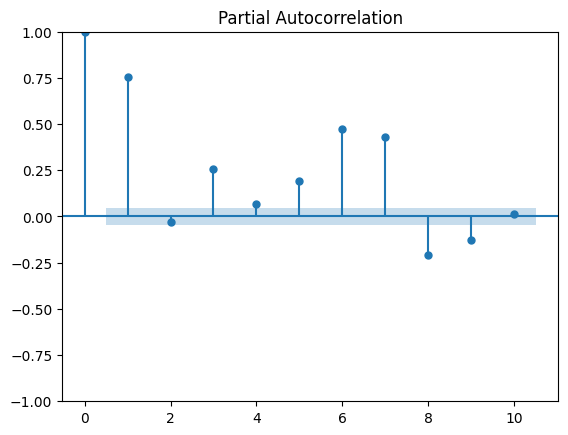

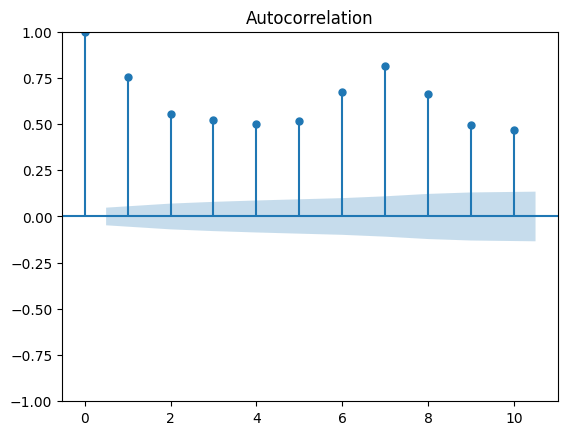

In [335]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
pacf = plot_pacf(sales["sales"],lags = 10)
acf = plot_acf(sales["sales"], lags = 10)

In autocorrelation (ACF) plot, each bar represents the correlation between the time series and its lagged values at different lags.All the values in the Autocorrelation graph show Positive values which indicate a positive correlation, meaning that the current value is correlated with the previous values at that lag. This suggests that there is a positive correlation between the sales and its lagged values at all lags.

On the other hand, in the partial autocorrelation (PACF) plot, each bar represents the correlation between the time series and its lagged values while removing the effects of the intermediate lags. The PACF helps to identify the direct influence of each lag on the current value. Positive values indicate a positive correlation, while negative values indicate a negative correlation. In this case, the presence of three negative values in the PACF plot suggests a negative correlation between the sales and the corresponding lags, while all the other positive values indicate a positive correlation.

### Checking for Trends in the dataset

In [343]:
#Importing seasonal decompose from stats model package
from statsmodels.tsa.seasonal import seasonal_decompose


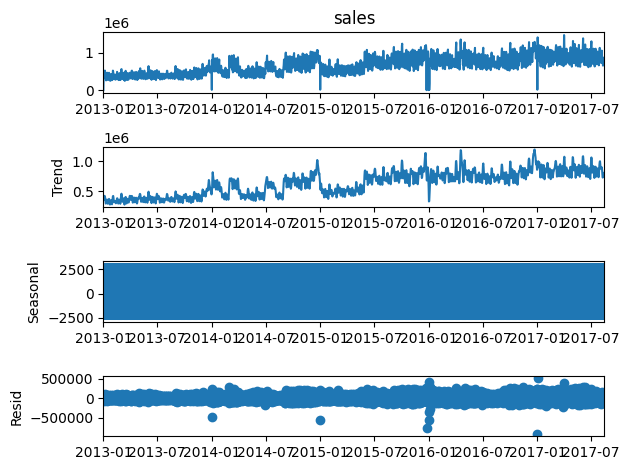

In [347]:
#Passing the dataset into the seasonal decompose method
decompose = seasonal_decompose(sales['sales'],model="Additive",period=4)
decompose.plot()
plt.show()